<a href="https://colab.research.google.com/github/estefaniabrito/SYS/blob/main/TALLER_DE_LAPLACE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Taller de Laplace
Estefania Ramirez Brito

Señales y sistemas




**Primer punto**:

 Encuentre la funcion de transferencia que caracteriza el sistema masa, resorte, amortiguador, presentado en la siguiente Figura
(asuma condiciones iniciales cero)

**Desarrollo manual:**https://drive.google.com/drive/folders/1TAvA9gHfbylhmZJFKIyr_mreL4Nhf5yB?usp=drive_link

![Péndulo Elástico Amortiguado](https://github.com/amalvarezme/SenalesSistemas/blob/master/4_Transformada_Laplace/damped_spring.png?raw=1)

##Desarrollo por código

In [3]:
!pip install sympy --upgrade #actualizar sympy para usar módulo de control
!pip install control

In [7]:
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np


sym.init_printing()

s = sym.symbols('s', complex=True)
t, m, c, k = sym.symbols('t m c k', positive=True, real=True)

# Entrada de interés en Laplace
X = 1  # X(s) = 1 Respuesta a impulso; X(s) = 1/s respuesta a escalón, X(s) = 1/s**2 respuesta a la rampa

# Función de transferencia del sistema masa-resorte-amortiguador
H = 1 / (m * s**2 + c * s + k)
H

      1       
──────────────
             2
c⋅s + k + m⋅s 

In [14]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

sym.init_printing()

# Definición de variables simbólicas
s = sym.Symbol('s', complex=True)
t, m, c, k = sym.symbols('t m c k', positive=True, real=True)

# Función de transferencia del sistema masa-resorte-amortiguador
H = 1 / (m*s**2 + c*s + k)

# Cálculo simbólico de los polos (raíces del denominador)
poles = sym.solve(m*s**2 + c*s + k, s, dict=True)
p1 = poles[0][s]  # Primer polo simbólico
p2 = poles[1][s]  # Segundo polo simbólico

# Definición simbólica de la frecuencia natural y el factor de amortiguamiento
wn = sym.sqrt(k/m)               # Frecuencia natural
xi = c / (2*sym.sqrt(m*k))       # Factor de amortiguamiento (damping ratio)

# Parámetros numéricos para sustituir (ejemplo)
param_values = {
    m: 4,
    c: sym.Rational('0.9'),
    k: sym.Rational('0.8')
}

# Evaluar la función de transferencia y los parámetros con los valores dados
H_evaluated = H.subs(param_values)
p1_evaluated = p1.subs(param_values)
p2_evaluated = p2.subs(param_values)
xi_evaluated = xi.subs(param_values)
wn_evaluated = wn.subs(param_values)

# Imprimir valores evaluados
print('p1 =', p1_evaluated)
print('p2 =', p2_evaluated)
print('xi =', xi_evaluated)
print('omega_n =', wn_evaluated)

# Mostrar H, p1, p2, H_evaluated en la última línea (forma simbólica y evaluada)
H, p1, p2, H_evaluated





p1 = -9/80 - sqrt(1199)*I/80
p2 = -9/80 + sqrt(1199)*I/80
xi = 9*sqrt(5)/80
omega_n = sqrt(5)/5


⎛                        ____________          ____________                ⎞
⎜                       ╱  2                  ╱  2                         ⎟
⎜      1         -c - ╲╱  c  - 4⋅k⋅m   -c + ╲╱  c  - 4⋅k⋅m         1       ⎟
⎜──────────────, ────────────────────, ────────────────────, ──────────────⎟
⎜             2          2⋅m                   2⋅m              2   9⋅s   4⎟
⎜c⋅s + k + m⋅s                                               4⋅s  + ─── + ─⎟
⎝                                                                   10    5⎠

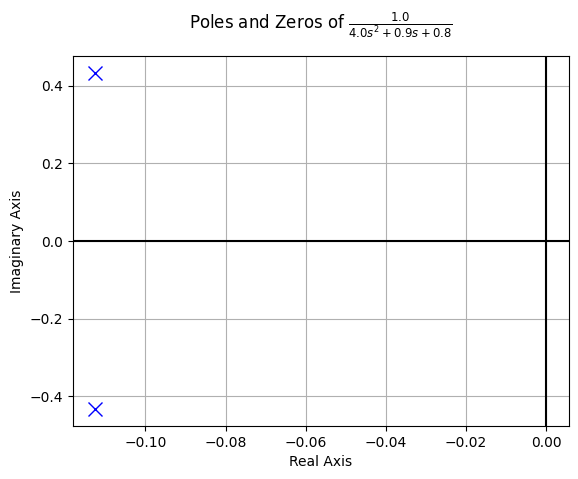

In [15]:
# En una nueva celda:
from sympy import symbols, fraction, cancel
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot

# Definir la variable de Laplace y parámetros
s = symbols('s', complex=True)
m, c, k = symbols('m c k', positive=True, real=True)

# Función de transferencia del sistema masa-resorte-amortiguador
H = 1 / (m*s**2 + c*s + k)

# Valores específicos (puedes cambiarlos según tu modelo)
param_values = {m: 4, c: 0.9, k: 0.8}
H_evaluated = H.subs(param_values)

# Separar numerador y denominador de la función de transferencia evaluada
num, den = fraction(cancel(H_evaluated))

# Crear la TransferFunction para la librería de control de Sympy
tf1 = TransferFunction(num, den, s)

# Graficar polos y ceros
pole_zero_plot(tf1)


In [17]:
import sympy as sym

# Inicialización de Sympy
sym.init_printing()

# Definición de variables simbólicas
t = sym.Symbol('t', positive=True, real=True)
s = sym.Symbol('s', complex=True)
m, c, k = sym.symbols('m c k', positive=True, real=True)

# Función de transferencia del sistema masa-resorte-amortiguador
H = 1 / (m*s**2 + c*s + k)

# EJEMPLO de entrada: X(s) = 1/s (escalón unitario)
# Podrías cambiar X(s) = 1 (impulso), X(s) = 1/s**2 (rampa), etc.
X = 1/s

# Salida en el dominio de Laplace: Y(s) = H(s) * X(s)
Y = H * X

# Mostramos la salida simbólica
print("Y(s) =", Y.simplify())

# (Opcional) Sustitución de parámetros numéricos
param_values = {m: 4, c: 0.9, k: 0.8}
Y_evaluated = Y.subs(param_values)
print("Y(s) evaluada =", sym.simplify(Y_evaluated))

# (Opcional) Transformada inversa de Laplace para obtener y(t)
y_t = sym.inverse_laplace_transform(Y, s, t)
print("y(t) =", sym.simplify(y_t))



Y(s) = 1/(s*(c*s + k + m*s**2))
Y(s) evaluada = 1/(s*(4*s**2 + 0.9*s + 0.8))
y(t) = -c*exp(-c*t/(2*m))*sin(t*sqrt(-c**2 + 4*k*m)/(2*m))/(k*sqrt(-c**2 + 4*k*m)) + 1/k - exp(-c*t/(2*m))*cos(t*sqrt(-c**2 + 4*k*m)/(2*m))/k


In [18]:
import sympy as sym

sym.init_printing()  # Para que Sympy muestre las expresiones en forma bonita

# Definimos la variable de Laplace y los parámetros simbólicos
s = sym.Symbol('s', complex=True)
t, m, c, k = sym.symbols('t m c k', positive=True, real=True)

# Función de transferencia del sistema masa-resorte-amortiguador
H = 1 / (m*s**2 + c*s + k)

X = 1/s

# Salida en el dominio de Laplace: Y(s) = H(s)*X(s)
Y = H * X

Y


        1         
──────────────────
  ⎛             2⎞
s⋅⎝c⋅s + k + m⋅s ⎠

In [36]:
#Modelo en el tiempo en función de RLC
Ye = Yp
#Se recorre cada fracción parcial según factorización para simplificar cálculos
for j in range(len(Ye.args)):
    if j==0:#primer elemento de la solucion
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else: #siguientes elementos concatenados
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)
yt






    ⎛ -R⋅t     ⎛     ______________⎞      -R⋅t     ⎛     ______________⎞⎞    
    ⎜ ─────    ⎜    ╱      2       ⎟      ─────    ⎜    ╱      2       ⎟⎟    
    ⎜  2⋅L     ⎜t⋅╲╱  - C⋅R  + 4⋅L ⎟       2⋅L     ⎜t⋅╲╱  - C⋅R  + 4⋅L ⎟⎟    
    ⎜ℯ     ⋅cos⎜───────────────────⎟   R⋅ℯ     ⋅sin⎜───────────────────⎟⎟    
    ⎜          ⎝      2⋅√C⋅L       ⎠               ⎝      2⋅√C⋅L       ⎠⎟    
- C⋅⎜─────────────────────────────── + ─────────────────────────────────⎟ + 1
    ⎜               C                              ______________       ⎟    
    ⎜                                             ╱      2              ⎟    
    ⎝                                        √C⋅╲╱  - C⋅R  + 4⋅L        ⎠    

In [37]:
#Modelo en el tiempo en función de RLC - substituir valores
Ye = Yp.subs(param_values).apart(s)
Ye



     C⋅(L⋅s + R)       1
- ────────────────── + ─
       2               s
  C⋅L⋅s  + C⋅R⋅s + 1    

In [38]:
#Se recorre cada fracción parcial según factorización para simplificar cálculos
for j in range(len(Ye.args)):
    if j==0:#primer elemento de la solucion
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else: #siguientes elementos concatenados
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)
yt

    ⎛ -R⋅t     ⎛     ______________⎞      -R⋅t     ⎛     ______________⎞⎞    
    ⎜ ─────    ⎜    ╱      2       ⎟      ─────    ⎜    ╱      2       ⎟⎟    
    ⎜  2⋅L     ⎜t⋅╲╱  - C⋅R  + 4⋅L ⎟       2⋅L     ⎜t⋅╲╱  - C⋅R  + 4⋅L ⎟⎟    
    ⎜ℯ     ⋅cos⎜───────────────────⎟   R⋅ℯ     ⋅sin⎜───────────────────⎟⎟    
    ⎜          ⎝      2⋅√C⋅L       ⎠               ⎝      2⋅√C⋅L       ⎠⎟    
- C⋅⎜─────────────────────────────── + ─────────────────────────────────⎟ + 1
    ⎜               C                              ______________       ⎟    
    ⎜                                             ╱      2              ⎟    
    ⎝                                        √C⋅╲╱  - C⋅R  + 4⋅L        ⎠    

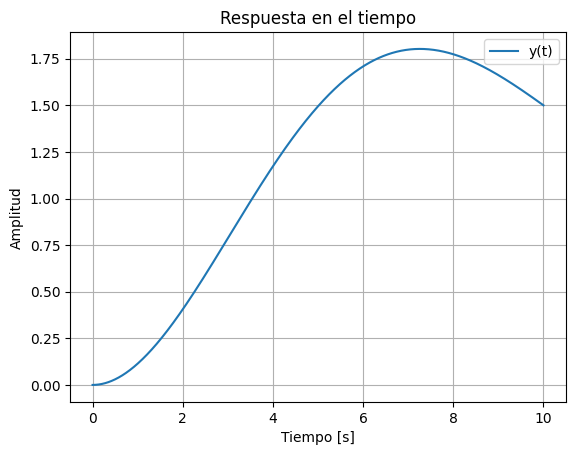

In [41]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

sym.init_printing()

# 1) Variables simbólicas
t = sym.Symbol('t', real=True, positive=True)
s = sym.Symbol('s', complex=True)
m, c, k = sym.symbols('m c k', positive=True, real=True)

# 2) Función de transferencia y entrada
H = 1/(m*s**2 + c*s + k)  # sistema masa-resorte-amortiguador
X = 1/s                  # escalón unitario
Y = H*X

# 3) Descomposición en fracciones parciales (opcional)
Yp = sym.apart(Y, s)

# 4) Transformada inversa término a término
terms = Yp.as_ordered_terms()
yt_sym = 0
for term in terms:
    yt_sym += sym.inverse_laplace_transform(term, s, t)

# 5) Sustituir valores numéricos en m, c, k
param_values = {m: 4, c: 0.9, k: 0.8}
yt_num = yt_sym.subs(param_values)

# 6) Crear función evaluable con lambdify
y_func = sym.lambdify(t, yt_num, 'numpy')

# 7) Definir vector de tiempo y evaluar
T = np.linspace(0, 10, 1000)
Y_vals = y_func(T)

# 8) Graficar
plt.figure()
plt.plot(T, Y_vals, label='y(t)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.title('Respuesta en el tiempo')
plt.grid(True)
plt.legend()
plt.show()


La gráfica muestra la respuesta en el tiempo de un sistema de segundo orden ante un escalón unitario; se observa un incremento desde cero hasta un valor máximo (sobrepaso), seguido de una ligera caída y una estabilización final alrededor de 1.7, lo cual indica que el sistema es estable y exhibe un comportamiento subamortiguado típico, con oscilaciones moderadas y un asentamiento en un valor finito de estado estacionario.

In [43]:
!pip install --upgrade sympy


In [46]:
import sympy
print(sympy.__version__)


1.13.3


TransferFunction en python-control: <TransferFunction>: sys[0]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


      2
-------------
2 s^2 + s + 5



/usr/local/lib/python3.11/dist-packages/control/pzmap.py:318: FutureWarning: pole_zero_plot() return value of poles, zeros is deprecated; use pole_zero_map()
  warnings.warn(


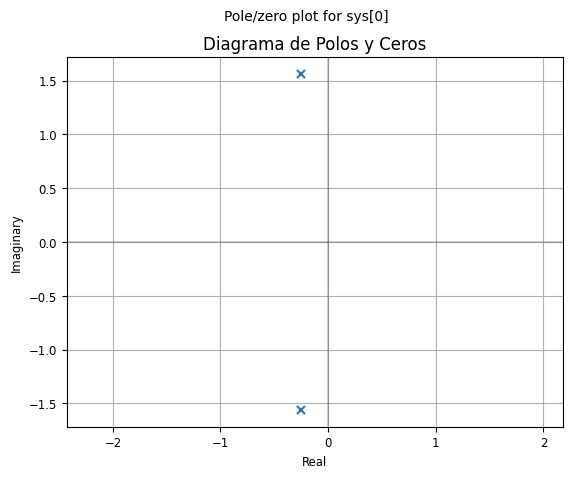

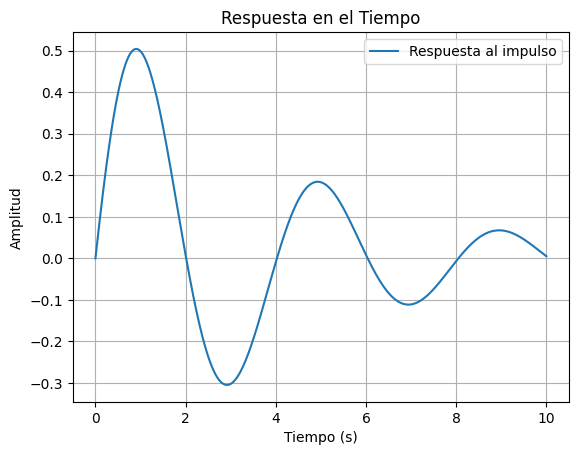

In [55]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
import control as ctl  # python-control

sym.init_printing()

# Definimos símbolos
s = sym.symbols('s', complex=True)
t, L, R, C = sym.symbols('t L R C', positive=True, real=True)

# Función de transferencia para un circuito RLC en serie (ejemplo)
H = 1 / (L*s**2 + R*s + 1/C)

# Definimos una entrada X(s) = 1 => respuesta a impulso
X = 1
Y = H*X

# Valores específicos
param_values = {L: 1, R: sym.Rational('0.5'), C: sym.Rational('0.4')}
H_evaluated = H.subs(param_values)
Y_evaluated = Y.subs(param_values)

# Obtenemos el numerador y denominador simbólicos, ya cancelados
num_sym, den_sym = sym.fraction(sym.cancel(H_evaluated))

# Convertimos num y den a polinomios en s
num_poly = sym.Poly(num_sym, s)
den_poly = sym.Poly(den_sym, s)

# Extraemos coeficientes como floats en orden decreciente
num_coeffs = [float(c) for c in num_poly.all_coeffs()]
den_coeffs = [float(c) for c in den_poly.all_coeffs()]

# Creamos la TransferFunction para python-control
tf1 = ctl.TransferFunction(num_coeffs, den_coeffs)

# Imprimimos la TF resultante
print("TransferFunction en python-control:", tf1)

# Polos y ceros con python-control
plt.figure()
ctl.pzmap(tf1, plot=True)
plt.title("Diagrama de Polos y Ceros")
plt.grid()
plt.show()

# Respuesta al impulso
t_values = np.linspace(0, 10, 1000)
t_out, y_out = ctl.impulse_response(tf1, t_values)
plt.figure()
plt.plot(t_out, y_out, label="Respuesta al impulso")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Respuesta en el Tiempo")
plt.legend()
plt.grid()
plt.show()
